In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


In [2]:
def to_su(values):
    mean = np.mean(values)
    std = np.std(values)
    return (values - mean)/std
def columns_to_su(table, columns):
    for column in columns:
        table = table.with_column(column + " (SU)", to_su(table.column(column)))
    return table
def compute_r(table, colx, coly):
    table_su = columns_to_su(table.select(colx,coly), [colx, coly])
    colx_su = table_su.column(2)
    coly_su = table_su.column(3)
    return np.mean(colx_su * coly_su)
def slope(table, colx, coly):
    r = compute_r(table, colx, coly)
    std_x = np.std(table.column(colx))
    std_y = np.std(table.column(coly))
    return (r * std_y) / std_x
def intercept(table, colx, coly):
    slope_t = slope(table, colx, coly)
    avg_x = np.average(table.column(colx))
    avg_y = np.average(table.column(coly))
    return avg_y - slope_t * avg_x
def rmse(table, colx, coly, s_slope, s_intercept):
    predictions = table.column(colx) * s_slope + s_intercept
    sq_differences = (table.column(coly) - predictions) ** 2
    mean_errors = np.mean(sq_differences)
    return mean_errors ** 0.5
def paint_line(table, colx, coly, s_slope, s_intercept):
    predictions = table.column(colx) * s_slope + s_intercept
    table_n = table.with_column("Prediction", predictions)
    table_n.select(colx, coly, "Prediction").scatter(colx, fit_line=True)
def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b
def scatter_fit(table, x, y):
    plots.scatter(table.column(x), table.column(y), s=20)
    plots.plot(table.column(x), fit(table, x, y), lw=2, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)
def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    eps = np.random.normal(0, 6, sample_size)
    y = (true_slope*x + true_int) + eps
    tyche = Table().with_columns(
        'x', x,
        'y', y
    )
    plots.figure(figsize=(6, 16))
    plots.subplot(4, 1, 1)
    plots.scatter(tyche['x'], tyche['y'], s=20)
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title('True Line, and Points Created')

    plots.subplot(4, 1, 2)
    plots.scatter(tyche['x'],tyche['y'], s=20)
    plots.title('What We Get to See')

    plots.subplot(4, 1, 3)
    scatter_fit(tyche, 'x', 'y')
    plots.xlabel("")
    plots.ylabel("")
    plots.title('Regression Line: Estimate of True Line')

    plots.subplot(4, 1, 4)
    scatter_fit(tyche, 'x', 'y')
    plots.ylabel("")
    xlims = np.array([np.min(tyche['x']), np.max(tyche['x'])])
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title("Regression Line and True Line")

In [3]:
lw = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week10/little_women.csv')
hybrid = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week10/hybrid.csv')
dugong = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week11/dugong.csv')
women = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week11/us_women.csv')
babies = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week7/baby.csv')

In [7]:
lw.show(3)

Characters,Periods
21759,189
22148,188
20558,231


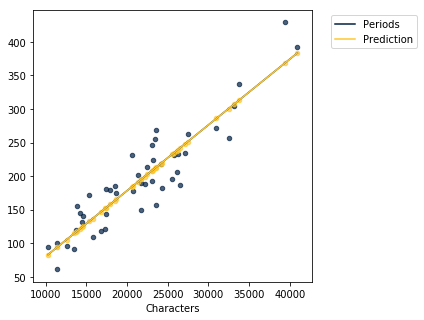

In [10]:
x = "Characters"
y = "Periods"
lw_slp = slope(lw, x,y)
lw_cpt = intercept(lw, x,y)
paint_line(lw, x,y,lw_slp,lw_cpt)

In [11]:
def residuals(table, colx, coly, s_slope, s_intercept):
    predictions = table.column(colx) * s_slope + s_intercept
    residuals = (table.column(coly) - predictions)
    return residuals
residuals(lw, x,y,lw_slp,lw_cpt)

array([ -6.49595795, -11.30577887,  47.26649686, -37.38951936,
        43.48124766,  14.40299289,   7.27362475,  11.48182715,
        23.89908175,  21.34395927, -14.88522134,  61.09250631,
         9.76714393,  22.06358758,  28.34249111,  39.24366361,
        36.67984878,  -9.11782144, -31.19719633,  23.02673001,
        56.01216504,   3.35460296,  39.20292362, -37.78479052,
       -23.86291013, -45.30008027, -27.68368391, -14.92288987,
        -6.51946699,  -0.78581435,  -7.34949402,  14.80239819,
        -2.84778427, -43.65289156,   9.90149601,   5.55733822,
       -55.78216339, -31.92306388,  11.54178829, -32.72770824,
       -54.57618265, -28.46777413,  -2.56737373,  11.83989271,
        -9.38243032, -13.74632964,   8.6965205 ])

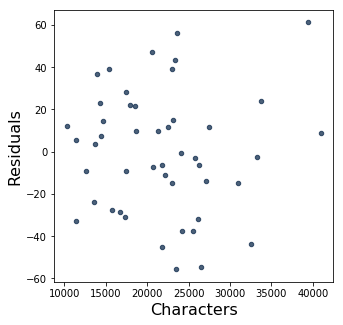

In [12]:
lw_res = lw.with_column("Residuals", residuals(lw, x,y,lw_slp,lw_cpt))
lw_res.scatter(0,2)

In [13]:
dugong.show(3)

Length,Age
1.8,1
1.85,1.5
1.87,1.5


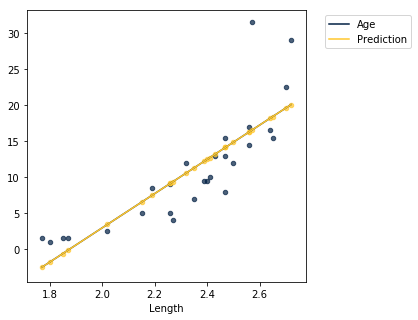

In [14]:
x = "Length"
y = "Age"
dg_slp = slope(dugong, x,y)
dg_cpt = intercept(dugong, x,y)
paint_line(dugong, x,y,dg_slp,dg_cpt)

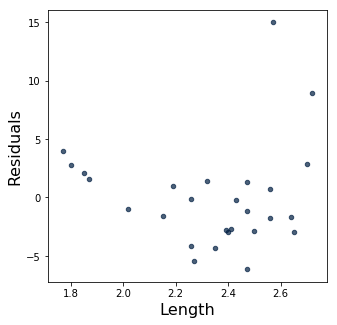

In [16]:
dg_res = dugong.with_column("Residuals", residuals(dugong, x,y,dg_slp,dg_cpt))
dg_res.scatter(0,2)

In [17]:
women.show(3)

height,ave weight
58,115
59,117
60,120


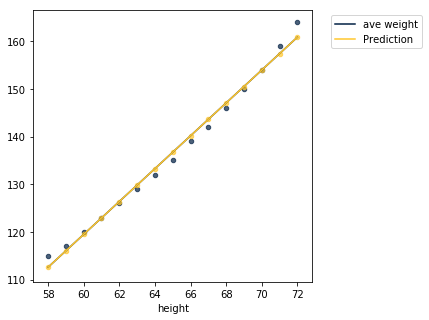

In [18]:
x = "height"
y = "ave weight"
wm_slp = slope(women, x,y)
wm_cpt = intercept(women, x,y)
paint_line(women, x,y,wm_slp,wm_cpt)

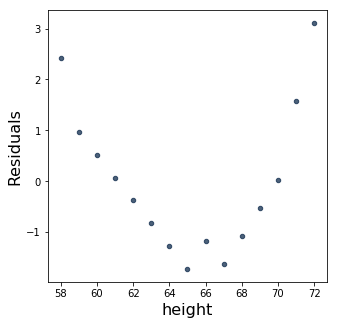

In [19]:
wm_res = women.with_column("Residuals", residuals(women, x,y,wm_slp,wm_cpt))
wm_res.scatter(0,2)

In [21]:
wm_sqw = women.with_column("SQR ave weight", women.column("ave weight") ** 0.5)

In [22]:
wm_sqw.show(3)

height,ave weight,SQR ave weight
58,115,10.7238
59,117,10.8167
60,120,10.9545


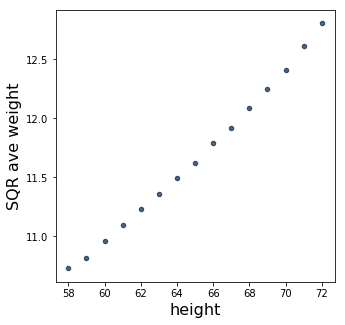

In [23]:
wm_sqw.scatter(0,2)

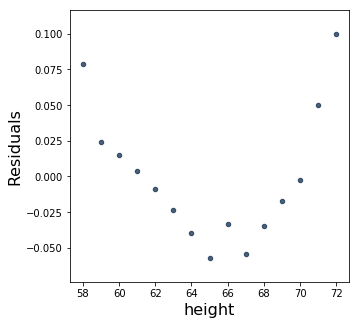

In [30]:
y = "SQR ave weight"
wm_slp2 = slope(wm_sqw, x,y)
wm_cpt2 = intercept(wm_sqw, x,y)
wm_res2 = wm_sqw.with_column("Residuals", residuals(wm_sqw, x,y,wm_slp2,wm_cpt2))
wm_res2.scatter(0,3)

In [31]:
np.average(wm_res2.column(3))

-7.105427357601002e-16

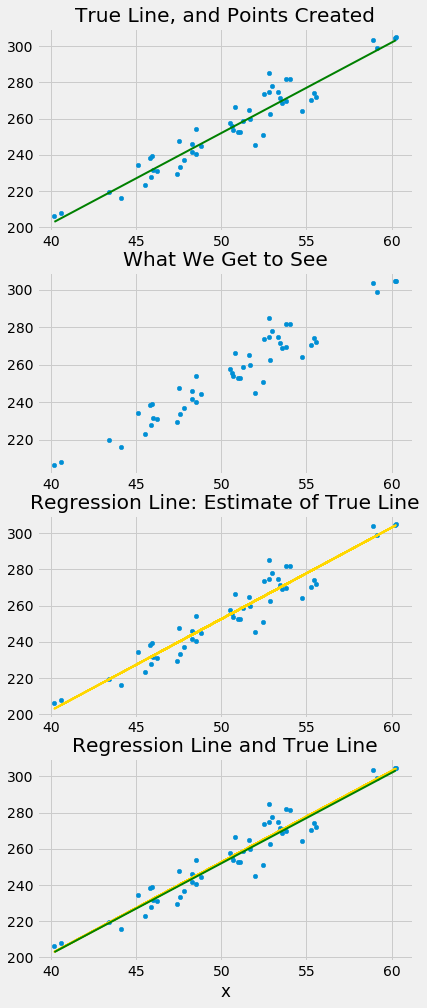

In [38]:
draw_and_compare(5, 2,50)

In [39]:
babies.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


In [40]:
compute_r(babies, "Birth Weight","Gestational Days")

0.4075427933888511

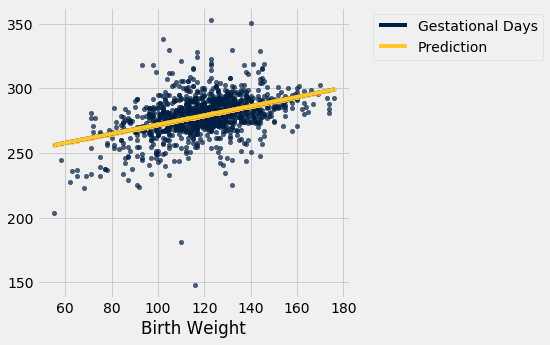

In [42]:
x = "Birth Weight"
y = "Gestational Days"
b_slp = slope(babies, x,y)
b_cpt = intercept(babies, x,y)
paint_line(babies, x,y,b_slp, b_cpt)

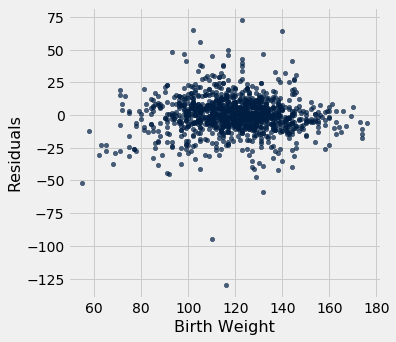

In [43]:
babies_res = babies.with_column("Residuals", residuals(babies, x,y,b_slp, b_cpt))
babies_res.scatter(x, "Residuals")

In [4]:
repetitions = 5000
statistics = make_array()
for _ in np.arange(repetitions):
    resample = babies.sample()
    b_slp = slope(resample, "Gestational Days","Birth Weight")
    statistics = np.append(statistics, b_slp)


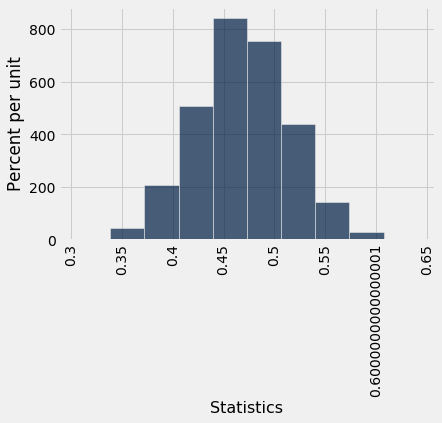

In [5]:
Table().with_column("Statistics", statistics).hist()